In [1]:
import pandas as pd 
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [4]:
data_salary = pd.read_csv("C:/Users/Admin/Downloads/Salary_Data (4).csv")

In [5]:
data_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

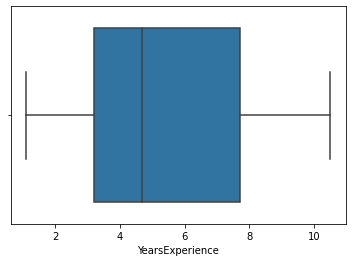

In [7]:
sns.boxplot(data_salary['YearsExperience'])

<AxesSubplot:>

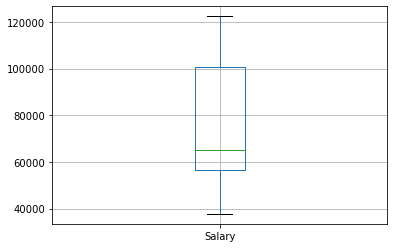

In [32]:
data_salary.boxplot(column=['Salary'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

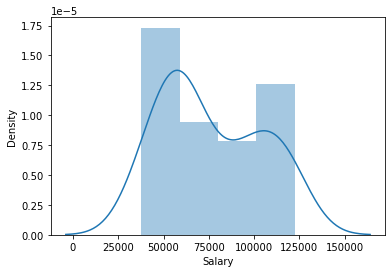

In [33]:
sns.distplot(data_salary["Salary"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

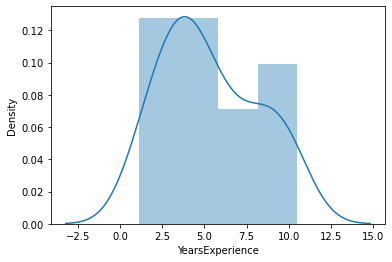

In [34]:
sns.distplot(data_salary["YearsExperience"])

In [35]:
data_salary=data_salary.rename({'YearsExperience':'Years_Experience'},axis=1)
data_salary

,Years_Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [36]:
data_salary[data_salary.isnull().any(axis=1)].head()

,Years_Experience,Salary


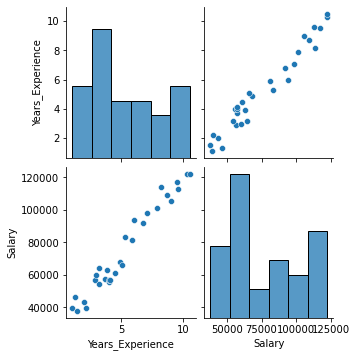

In [37]:
sns.pairplot(data_salary)

In [38]:
data_salary.corr

<bound method DataFrame.corr of     Years_Experience    Salary
0                1.1   39343.0
1                1.3   46205.0
2                1.5   37731.0
3                2.0   43525.0
4                2.2   39891.0
5                2.9   56642.0
6                3.0   60150.0
7                3.2   54445.0
8                3.2   64445.0
9                3.7   57189.0
10               3.9   63218.0
11               4.0   55794.0
12               4.0   56957.0
13               4.1   57081.0
14               4.5   61111.0
15               4.9   67938.0
16               5.1   66029.0
17               5.3   83088.0
18               5.9   81363.0
19               6.0   93940.0
20               6.8   91738.0
21               7.1   98273.0
22               7.9  101302.0
23               8.2  113812.0
24               8.7  109431.0
25               9.0  105582.0
26               9.5  116969.0
27               9.6  112635.0
28              10.3  122391.0
29              10.5  121872.0>

In [39]:
data_salary.corr()

,Years_Experience,Salary
Years_Experience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='Years_Experience', ylabel='Salary'>

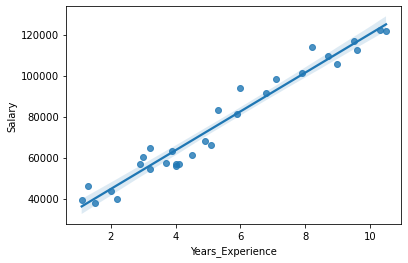

In [40]:
sns.regplot(x=data_salary['Years_Experience'],y=data_salary['Salary'])

In [51]:
model = smf.ols("np.log(Salary)~(Years_Experience)",data=data_salary).fit()

In [52]:
model.params

Intercept           10.507402
Years_Experience     0.125453
dtype: float64

In [53]:
(model.tvalues,'\n',model.pvalues)

(Intercept           273.327166
 Years_Experience     19.584833
 dtype: float64,
 '\n',
 Intercept           1.604634e-49
 Years_Experience    7.027439e-18
 dtype: float64)

In [54]:
model.rsquared , model.rsquared_adj

(0.9319671194084195, 0.9295373736730059)

In [55]:
data_salary.describe()

,Years_Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [56]:
new_data = pd.Series([5,7])

In [57]:
data_frame = pd.DataFrame(new_data,columns=["Years_Experience"])

In [58]:
data_frame

,Years_Experience
0,5
1,7


In [59]:
model.rsquared

0.9319671194084195

In [60]:
model.predict(data_frame)

0    11.134666
1    11.385572
dtype: float64